<a href="https://colab.research.google.com/github/aruntilak2/pytorch_challenge/blob/master/Copy_of_Final_submission_of_Important_Resnet_1_2_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# When installing torch you need to always use this script

In [1]:
# google colab does not come with torch installed. And also, in course we are using torch 0.4. 
# so following snippet of code installs the relevant version

from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision


MessageError: ignored

# Installing PIL

In [0]:
!pip uninstall -y Pillow


In [2]:
!pip install Pillow==5.3.0
# import the new one
import PIL
print("The version is : ",PIL.PILLOW_VERSION)

The version is :  5.3.0


In [0]:
!wget https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py

# Imports

In [0]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import torch
import torchvision
import numpy as np
import helper #just in case xD
import matplotlib.pyplot as plt

from torch.utils.data.sampler import SubsetRandomSampler
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import models, transforms, datasets
import image
import PIL
import matplotlib.pyplot as plt

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [0]:
!wget -nc https://s3.amazonaws.com/content.udacity-data.com/courses/nd188/flower_data.zip
!unzip -n flower_data.zip >/dev/null

In [8]:

#Data augmentation is done here thanks to the transforms.
train_data_transforms = transforms.Compose([transforms.RandomRotation(30),
                               transforms.RandomResizedCrop(224),
                               transforms.RandomHorizontalFlip(),
                               transforms.ToTensor(),
                               transforms.Normalize([0.485, 0.456, 0.406],
                                                    [0.229, 0.224, 0.225])])
test_data_transforms = transforms.Compose([transforms.RandomRotation(30),
                               transforms.RandomResizedCrop(224),
                               transforms.RandomHorizontalFlip(),
                               transforms.ToTensor(),
                               transforms.Normalize([0.485, 0.456, 0.406],
                                                    [0.229, 0.224, 0.225])])


#But we mustn't use the dataAugmentaion on validation and testing set, so you need different transforms
#data_dir = '/flower_data'
image_train_data = datasets.ImageFolder('flower_data/train', transform = train_data_transforms)
#print(train_datas
image_test_data = datasets.ImageFolder('flower_data/valid', transform = test_data_transforms)
#Given code
#data_dir = data_dir + '/train'
valid_size = 0.2
num_train = len(image_train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_index= indices[split:]
valid_index = indices[:split]

train_sampler = SubsetRandomSampler(train_index)
valid_sampler = SubsetRandomSampler(valid_index)

train_data_loader = torch.utils.data.DataLoader(image_train_data, batch_size=16,sampler = train_sampler,
                                                                                num_workers = 0)

valid_data_loader = torch.utils.data.DataLoader(image_train_data, batch_size=16,sampler = valid_sampler,
                                                                                num_workers = 0)
test_data_loader = torch.utils.data.DataLoader(image_test_data, batch_size=16, shuffle = True, num_workers = 0)
print(train_data_loader)

#Given code                                       
#valid_dirdata_dir + '/valid'
#test_loader = torch.utils.data.DataLoader(test_data, batch_size = 64, shuffle= True, download = True, transfrom= transform)

In [9]:
dataiter = iter(test_data_loader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([16, 3, 224, 224])
torch.Size([16])


In [12]:
#For my understanding
print(np.transpose(images[0],(0,2,1)).shape)
print(np.transpose(images[0],(1,2,0)).shape)
print(np.transpose(images[0],(2,1,0)).shape)

torch.Size([3, 224, 224])
torch.Size([224, 224, 3])
torch.Size([224, 224, 3])


0.9999999964237213


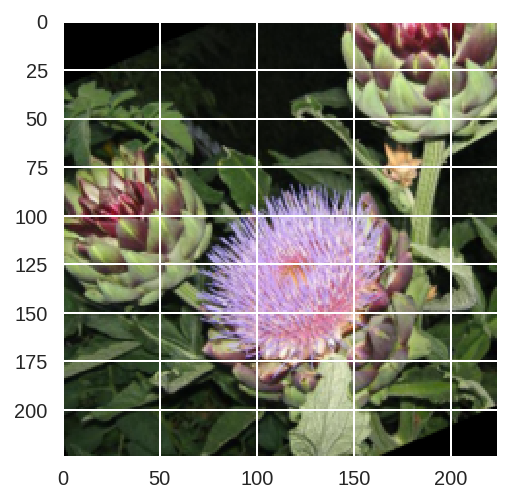

In [10]:
#torch.transpose(images,0,1)

im = images[0].numpy()
im = np.transpose(im, (1, 2, 0))

im = (im *  [0.229, 0.224, 0.225]) + [0.485, 0.456, 0.406]
print(np.max(im))
#print(np.min(im))
im = np.clip(im,0,1)
plt.imshow(im, cmap ='Greys_r')

#plt.imshow(images[1].numpy().transpose((1,2,0)).squeeze(), cmap='Greys_r');

In [11]:
model = models.resnet50(pretrained = True)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:03<00:00, 27060555.51it/s]


In [0]:
model

In [0]:
for param in model.parameters():
    param.requires_grad = True
classifier = nn.Sequential(nn.Linear(2048, 102),
                         nn.LogSoftmax(dim=1))
model.fc = classifier

In [28]:
criterion = nn.NLLLoss()
optimizer= optim.SGD(classifier.parameters(),lr = 0.0001)
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

# Training the network
Now you can work on the neural net by tweaking the parameters :) 

ok. yesterday you mentioned about hyper parameters. whats that?
- number of epochs
- size of the hidden layers in your neural net
- number of hidden layers in neural net
- learning rate
- you can also work on data augmentation
- try different pretrained models
- try learning rate scheduler, this one adapts learning rate as you're training the model (you should read about it)
- try changing the momentum and the optimizer (SGD has momentum)
- try changing dropout value

I may have missed some but these are the principal ones
When changing hyperparameters try doing one hyperparameter at once, so you can see which one is making the model better. When you get a better model, keep that hyperparameter and go to others.
Got it ? :) yes I will read docs agai more and more.
Did you finish lesson 5? I wathed and answer quizees
but when it comes to put it in action. I cant
You should try to solve the exercises, especially the first one about MNIST with validation.> That one is in 4th lesson right
Nope in 5th. You should definitely do it. OK
The eay ihave been doing is watching clalsses and working on solutions and push it to Github
let me show you
So I actually watch solution in the video and try in excdrsice to make sure this is working. 

AM i doing correct?
I personally try to implement my own solution. And go check with the solution when i finish. OK
I need to improve alooooooot
everything
including modules, working wiht packages, functions, actuchitechureds of networks and read docs
For packages this comes along, what you should really do is try to implement this
You should take a look at that notebook :)

why only testing in Colab?
Well, actually, you're using only testing and training data.
You need to add validation data. As in the notebook
And watch the associated video, this will really help. OK
And what Other Excersices should i foucs in order to complete the project in addition to knowledge?
Hmm, maybe the transfer learning part. But you already ddi it YEs
I guess this is fixed i let you work on it ! :)OK

So Should I work on the next task in the project? which is ...valiadation? yea i think you should fix that first before getting to tuning your parameters. As this will help you to tell if your program is performing well or not. ok
Oh you should also take a loot at this part : Saving models
ok
I let you work on it good luck ! :) 
Ok THANK YOU SO MUCH NADIR
You're very welcome Tilak :D 

# Rubric: 
Testing Accuracy
:The network's accuracy is measured on the test data

# **Validation Loss and Accuracy:During training, **

the validation loss and accuracy are displayed

# Loading checkpoints:
There is a function that successfully loads a checkpoint and rebuilds the model

# Saving the model:
The trained model is saved as a checkpoint along with associated hyperparameters and the
# **class_to_idx dictionary**

# Image Processing:
The process_image function successfully converts a PIL image into an object that can be used as input to a trained model

# Class Prediction:
The predict function successfully takes the path to an image and a checkpoint, then returns the top K most probably classes for that image

# Sanity Checking with matplotlib:
A matplotlib figure is created displaying an image and its associated top 5 most probable classes with actual flower names

In [29]:
############################################################ TRAIING THE NEURAL NET
epochs = 3
steps = 0
print_every = 30
valid_min_loss = np.Inf
for epoch in range(epochs):
  model.train()
  running_loss = 0
  valid_loss = 0
  for images, labels in train_data_loader:
    steps += 1
    images, labels = images.to(device), labels.to(device)
    optimizer.zero_grad()
    logps = model(images)
    loss = criterion(logps, labels)
    loss.backward()
    optimizer.step()
    running_loss += loss.item() 
    if steps % print_every == 0:
        model.eval()
        test_loss = 0
        accuracy = 0
        with torch.no_grad():
            for images,labels in valid_data_loader: # Here we nee to go through validation data
                images, labels = images.to(device), labels.to(device)
                logps = model(images)
                loss = criterion(logps, labels)
                test_loss +=  loss.item()
                ps = torch.exp(logps)
                top_ps, top_class = ps.topk(1, dim =1)
                equality = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equality.type(torch.cuda.FloatTensor)).item()
        print(f"Epoch: {epoch+1}/{epochs}.."
             f"Train Loss: {running_loss/print_every:.3f}.."
             f"Validation Loss: {test_loss/len(valid_data_loader):.3f}.."
             f"Validation Accuracy: {accuracy/len(valid_data_loader):.3f}" # Test is done in the end, here we're doing validation
         )
        running_loss = 0 # we're calculating the loss over each 5 batches so need to set running loss to 0 after each 5 steps
        
  #Validation loop to save the model when we do better
  accuracy = 0
  valid_loss = 0
  for images,labels in valid_data_loader:
    images, labels = images.to(device), labels.to(device)
    logps = model(images)
    loss = criterion(logps, labels)
    valid_loss +=  loss.item()
    ps = torch.exp(logps)
    top_ps, top_class = ps.topk(1, dim =1)
    equality = top_class == labels.view(*top_class.shape)
    accuracy += torch.mean(equality.type(torch.cuda.FloatTensor)).item()
    valid_loss = valid_loss/len(valid_data_loader)
    # Saving the new best model if it gets better at each epoch :
  #save here
  if valid_min_loss > valid_loss:     # condition verifies if it gets better ? lower loss means better loss
      #Save it 
      model.class_to_idx = image_train_data.class_to_idx
      torch.save({ 
      'arch': 'resnet50',
      'model_state_dict':image_train_data.class_to_idx,
      'class_to_idx': model.class_to_idx,
      'model_state_dict':model.state_dict,
      'loss':test_loss   
      }, 'test.pth')      #Update best loss
      #valid_min_loss=valid_loss
      print("Better loss ! Saving...")

  print(f"FINISHED Epoch: {epoch+1}/{epochs}.."
               f"Validation Loss: {valid_loss/len(valid_data_loader):.3f}..."
               f"Validation Accuracy: {accuracy/len(valid_data_loader):.3f}.."
               f"Valid Loss: {valid_loss:.3f}.."
           )
  if valid_min_loss > valid_loss:     # condition verifies if it gets better ? lower loss means better loss
      #Save it 
      model.class_to_idx = image_train_data.class_to_idx
      torch.save({ 
      'arch': 'resnet50',
      'model.class_to_idx' : image_train_data.class_to_idx,
      'class_to_idx': model.class_to_idx,
      'model_state_dict':model.state_dict,
      'loss':test_loss   
      }, 'test2.pth')      #Update best loss
      #valid_min_loss=valid_loss
      print("Better loss ! Saving...")

Epoch: 1/3..Train Loss: 0.950..Validation Loss: 0.803..Validation Accuracy: 0.855
Epoch: 1/3..Train Loss: 0.691..Validation Loss: 0.807..Validation Accuracy: 0.858
Epoch: 1/3..Train Loss: 0.689..Validation Loss: 0.843..Validation Accuracy: 0.842
Epoch: 1/3..Train Loss: 0.673..Validation Loss: 0.875..Validation Accuracy: 0.829
Epoch: 1/3..Train Loss: 0.739..Validation Loss: 0.887..Validation Accuracy: 0.834
Epoch: 1/3..Train Loss: 0.663..Validation Loss: 0.842..Validation Accuracy: 0.836
Epoch: 1/3..Train Loss: 0.677..Validation Loss: 0.839..Validation Accuracy: 0.842
Epoch: 1/3..Train Loss: 0.618..Validation Loss: 0.842..Validation Accuracy: 0.845
Epoch: 1/3..Train Loss: 0.756..Validation Loss: 0.879..Validation Accuracy: 0.834
Epoch: 1/3..Train Loss: 0.702..Validation Loss: 0.849..Validation Accuracy: 0.832
Better loss ! Saving...
FINISHED Epoch: 1/3..Validation Loss: 0.000...Validation Accuracy: 0.861..Valid Loss: 0.013..
Better loss ! Saving...
Epoch: 2/3..Train Loss: 0.061..Validat

## Testing the model on test  data

In [25]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
model_save_name = 'resnet50_model_copy.pth'
path = F"/content/drive/My Drive/{model_save_name}" 
torch.save(model.state_dict(), path) 

In [0]:
go through test_data and calculate accuracy
accuracy = 0
for images,labels in test_data_loader:
  #Caculate the loss
  images, labels = images.to(device), labels.to(device)
  logps = model(images)
  loss = criterion(logps, labels)
  valid_loss +=  loss.item()
  ps = torch.exp(logps)
  top_ps, top_class = ps.topk(1, dim =1)
  equality = top_class == labels.view(*top_class.shape)
  accuracy += torch.mean(equality.type(torch.cuda.FloatTensor)).item()
  valid_loss = valid_loss/len(valid_data_loader)
  print(f"Test Accuracy: {accuracy/len(test_data_loader):.3f}")


SyntaxError: ignored

In [0]:
print(model.state_dict().keys())

In [0]:
!wget -cq https://github.com/udacity/pytorch_challenge/raw/master/cat_to_name.json
  